In [53]:
import praw #import the reddit wrapper class
import pandas
import matplotlib as plt
import numpy as np
from collections import Counter

In [54]:
reddit = praw.Reddit(user_agent='Comment Extraction (by /u/USERNAME)',
                     client_id='MzP2Nwj9ntK6UQ', client_secret="pc7UJvP9yEgrKzJHXDHiBE3rIP4",
                     username='farpista', password='Bratik123') #create a reddit instance

In [62]:
# Create a submission object that holds details of a specific post
submission = reddit.submission(id='79lznp') 

In [64]:
words ={}
#Gathering data and cleaning it up
for i in range(len(submission.comments)):
    tmp = submission.comments[i].body.split(" ")
    for k in range(len(tmp)):
        if(tmp[k].replace('\n','') not in words):
            words[tmp[k].replace('\n','')] = 0
        words[tmp[k].replace('\n','')] += 1

In [65]:
# Making a dictionary that contains the most frequent words
# PS: The threshold here is contained to be 30. An algorithm could probably be written to optimize ths process,
# but according to me that is out of the scope of this project.
highestWords = {}
words = Counter(words)
for k in words:
    if words[k] > 30:
        highestWords[k] = words[k]
#Making a data frame that contains most frequent words.
dataFrame=pandas.Series(highestWords, name = "Distribution of words on the UIUC subreddit's Spring megathread")

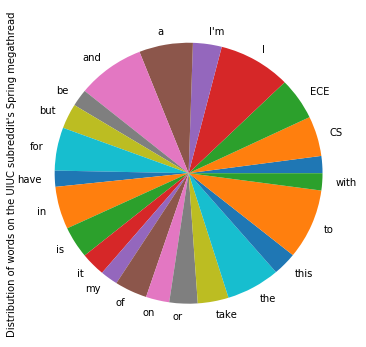

In [68]:
# Plotting a 6x6 pie chart for the data frame we just created.
dataFrame.plot.pie(figsize=(6, 6))

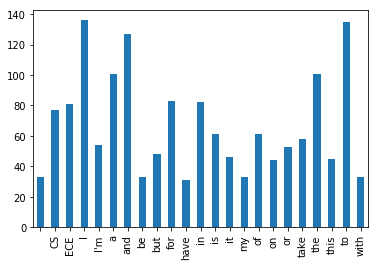

In [69]:
# Plotting a bar plot for more detailed information.
dataFrame.plot.bar()